In [1]:
import pandas

In [2]:
data = pandas.read_csv('healthcare_dataset.csv')

In [3]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


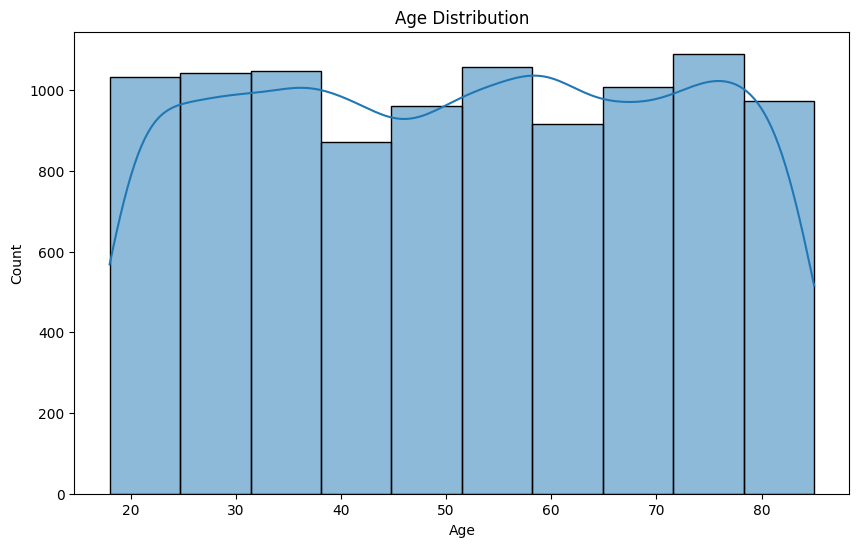

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


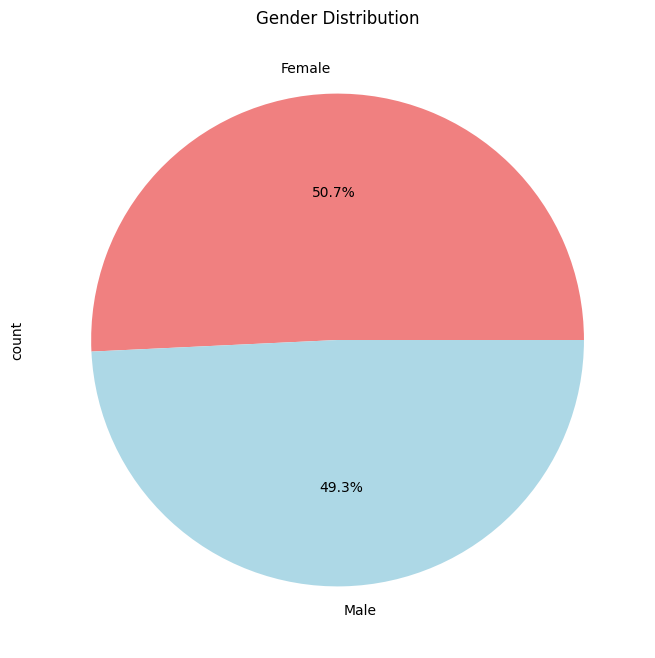

In [5]:
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')
plt.show()


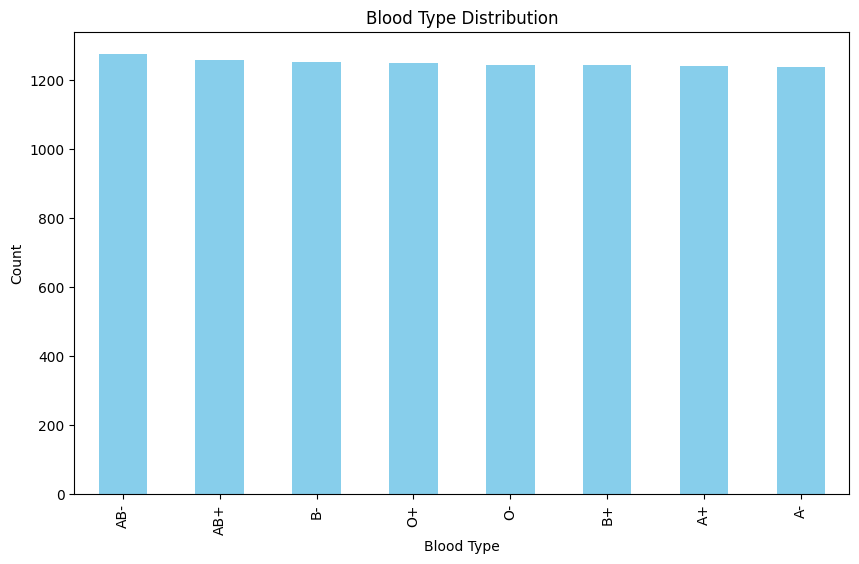

In [6]:
plt.figure(figsize=(10, 6))
data['Blood Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()


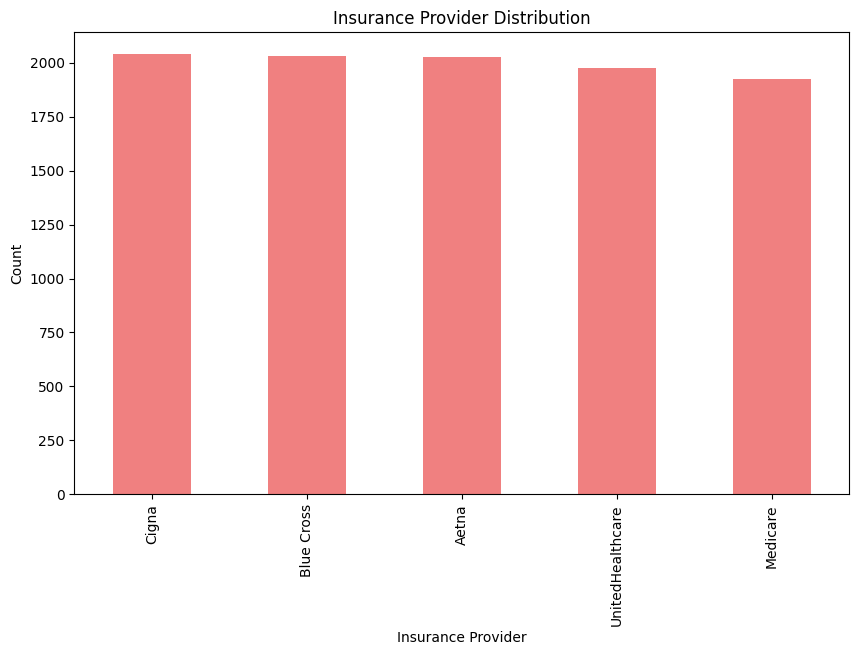

In [9]:
plt.figure(figsize=(10, 6))
data['Insurance Provider'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Insurance Provider Distribution')
plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.show()


In [11]:
import pandas as pd
import numpy as np

data.dropna(inplace=True)

categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Test Results']

for col in categorical_columns:
    data[col] = data[col].astype('category')

data['Date of Admission'] = pd.to_datetime(data['Date of Admission'], errors='coerce')

z_scores = np.abs((data['Billing Amount'] - data['Billing Amount'].mean()) / data['Billing Amount'].std())
data = data[(z_scores < 3)]

columns_to_drop = ['Room Number']  
data = data.drop(columns=columns_to_drop)

data.info()

summary_stats_after_cleaning = data.describe(include='all')
print(summary_stats_after_cleaning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  category      
 3   Blood Type          10000 non-null  category      
 4   Medical Condition   10000 non-null  category      
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  category      
 9   Billing Amount      10000 non-null  float64       
 10  Admission Type      10000 non-null  category      
 11  Discharge Date      10000 non-null  object        
 12  Medication          10000 non-null  object        
 13  Test Results        10000 non-null  category   

In [12]:
summary_stats_after_cleaning

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Profitability
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000,10000.000000
unique,9378,NaN,2,8,6,NaN,9416,8639,5,NaN,3,1834,5,3,NaN
top,Michael Johnson,NaN,Female,AB-,Asthma,NaN,Michael Johnson,Smith PLC,Cigna,NaN,Urgent,2021-11-28,Penicillin,Abnormal,NaN
freq,7,NaN,5075,1275,1708,NaN,7,19,2040,NaN,3391,14,2079,3456,NaN
mean,NaN,51.452200,NaN,NaN,NaN,2021-05-01 21:53:25.439999744,NaN,NaN,NaN,25516.806778,NaN,NaN,NaN,NaN,20516.806778
min,NaN,18.000000,NaN,NaN,NaN,2018-10-30 00:00:00,NaN,NaN,NaN,1000.180837,NaN,NaN,NaN,NaN,-3999.819163
25%,NaN,35.000000,NaN,NaN,NaN,2020-02-10 00:00:00,NaN,NaN,NaN,13506.523967,NaN,NaN,NaN,NaN,8506.523967
50%,NaN,52.000000,NaN,NaN,NaN,2021-05-02 00:00:00,NaN,NaN,NaN,25258.112566,NaN,NaN,NaN,NaN,20258.112566
75%,NaN,68.000000,NaN,NaN,NaN,2022-07-23 06:00:00,NaN,NaN,NaN,37733.913727,NaN,NaN,NaN,NaN,32733.913727
max,NaN,85.000000,NaN,NaN,NaN,2023-10-30 00:00:00,NaN,NaN,NaN,49995.902283,NaN,NaN,NaN,NaN,44995.902283
